# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [61]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from random import shuffle, seed

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SequentialFeatureSelector, RFE

In [62]:
pwd

'/Users/shivaallala/UcBerkeley_ML_AI_Program/Used-Car-dealership-cost-Prediction'

In [63]:
cars_df = pd.read_csv('/Users/shivaallala/UcBerkeley_ML_AI_Program/Used-Car-dealership-cost-Prediction/vehicles.csv')

In [64]:
cars_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [65]:
#Cars dataset info
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Data Problem Definition:
Our objective is to develop a predictive model that accurately estimates the price of used cars based on various attributes. This involves identifying the key features that significantly influence the pricing of used cars. The dataset contains information on 426,880 used cars, including attributes such as year, manufacturer, model, condition, odometer reading, and others. By analyzing these attributes, we aim to uncover patterns and relationships that can help us understand the factors driving car prices in the used car market.


In [66]:
#ID and VIN columns seems to serve as a unique identifier for each car listing,which may not directly contribute to predicting car prices

#Dropping the ID column
cars = cars_df.drop(columns=['id','VIN'])

In [67]:
cars.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [68]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [69]:
#There are only 3 numerical attribute to assess continous statistical methods.
cars.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


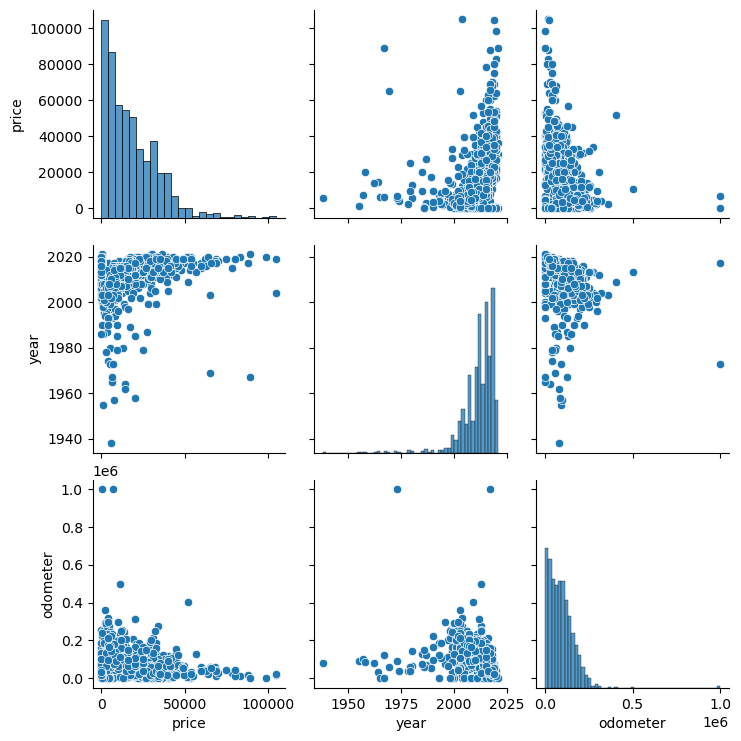

In [70]:
# Lets explore the numeric attribute with a pariplot
# Select a subset of columns for pair plot (excluding non-numeric columns)
numeric_cols = cars.select_dtypes(include=['int64', 'float64']).columns
subset_df = cars[numeric_cols]

# Create pair plot
sns.pairplot(subset_df.sample(n=1000))  # Subsampling for faster plotting (optional)
plt.show()

##### Cars Attributes value counts

In [53]:
# Lets observe the values counts of all categorical attributes
# Select non-numeric columns
non_numeric_cols = cars.select_dtypes(exclude=['int64', 'float64']).columns

# Loop through non-numeric columns and display value counts
for col in non_numeric_cols:
    print(f"Value counts for {col}:")
    print(cars[col].value_counts())
    print("\n")

Value counts for region:
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64


Value counts for manufacturer:
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427


##### Continued Exploration

Explore the average price of unique values in each attribute that has no more than 15 unique values

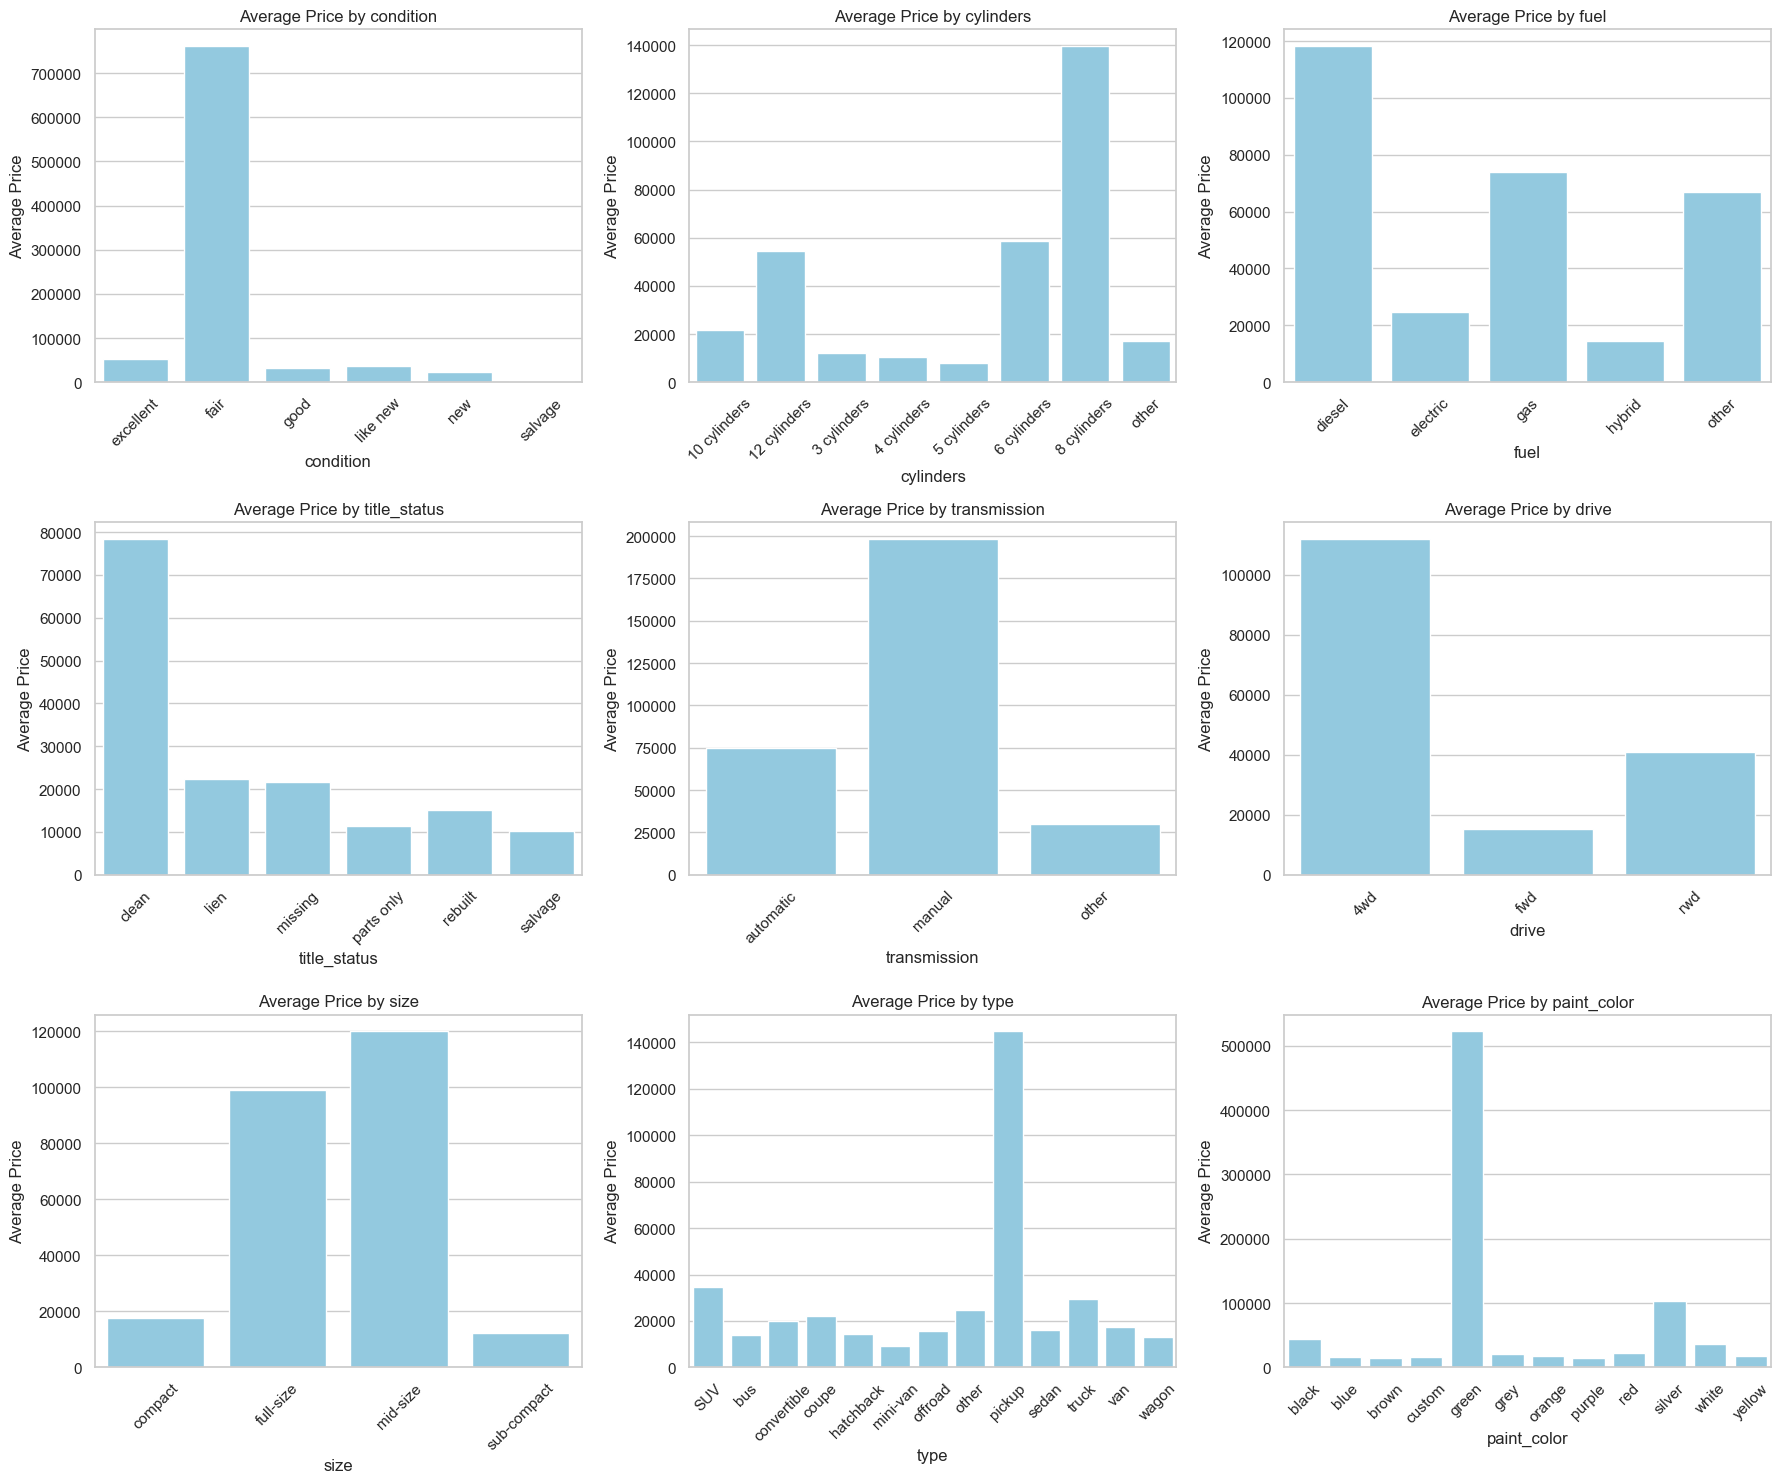

In [79]:
# Define a list of categorical attributes with no more than 15 unique values
attributes_to_explore = [col for col in cars.columns if cars[col].nunique() <= 15 and cars[col].dtype == 'object']

# Calculate the number of rows and columns for subplots
num_plots = len(attributes_to_explore)
num_cols = 3  # Number of columns for subplots
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows))
axes = axes.flatten()

# Loop through each attribute and calculate average price for each unique value
for i, attribute in enumerate(attributes_to_explore):
    # Group by the attribute and calculate the average price for each unique value
    avg_price_by_value = cars.groupby(attribute)['price'].mean().reset_index()
    
    # Plot average price for each unique value within the attribute
    sns.barplot(data=avg_price_by_value, x=attribute, y='price', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Average Price by {attribute}')
    axes[i].set_xlabel(attribute)
    axes[i].set_ylabel('Average Price')
    axes[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

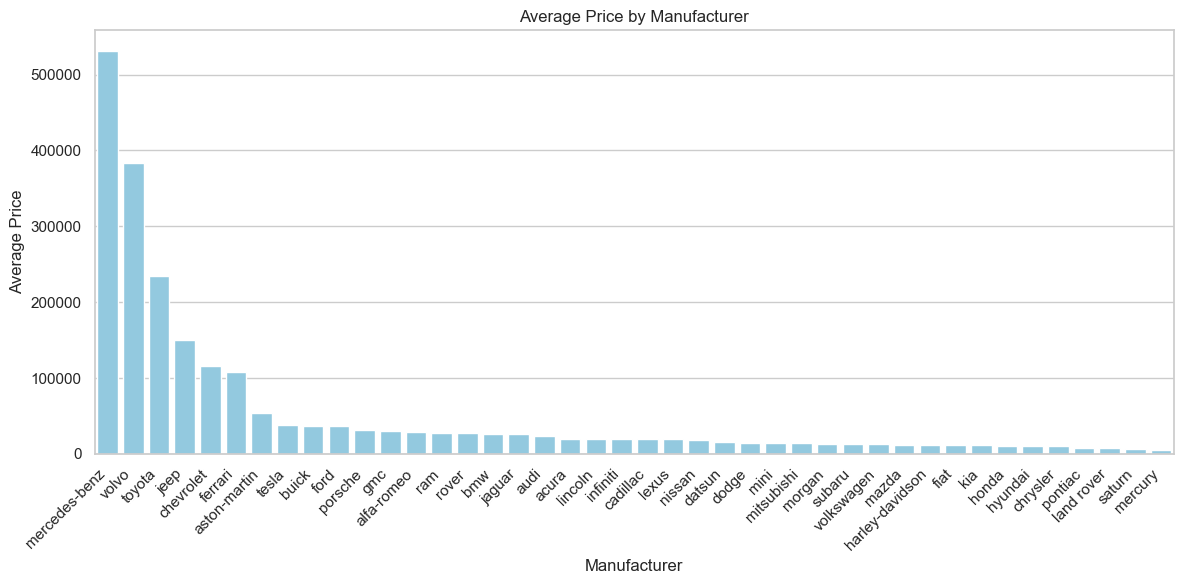

In [81]:
#Average price based on manufacturer
avg_price_by_manufacturer = cars.groupby('manufacturer')['price'].mean().reset_index()

# Sort manufacturers by average price
avg_price_by_manufacturer = avg_price_by_manufacturer.sort_values(by='price', ascending=False)

# Plot average price by manufacturer
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_manufacturer, x='manufacturer', y='price', color='skyblue')
plt.title('Average Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Data Preparation
After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.

**Let's proceed with constructing the final dataset prior to modeling.**

Handle Missing Values: We can address missing values by either removing rows or imputing values.

Feature Engineering: We can create new features from existing ones if we believe they would be beneficial for the modeling process. This could involve creating dummy variables for categorical features or deriving new features from existing ones.

Feature Transformation: We can apply transformations such as scaling, logarithms, or normalization to the features to make them more suitable for modeling.


#### Removing certain attributes deamed unnecessary

In [82]:
cars['model'].value_counts()

f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: model, Length: 29649, dtype: int64

High Cardinality: Attributes with a large number of unique categories may not provide much predictive power and can lead to overfitting in models. For example, the "model" attribute has a high cardinality with 29,649 unique categories.so lets drop model attribute. 

In [83]:
cars.drop(columns = ['model'], inplace = True)

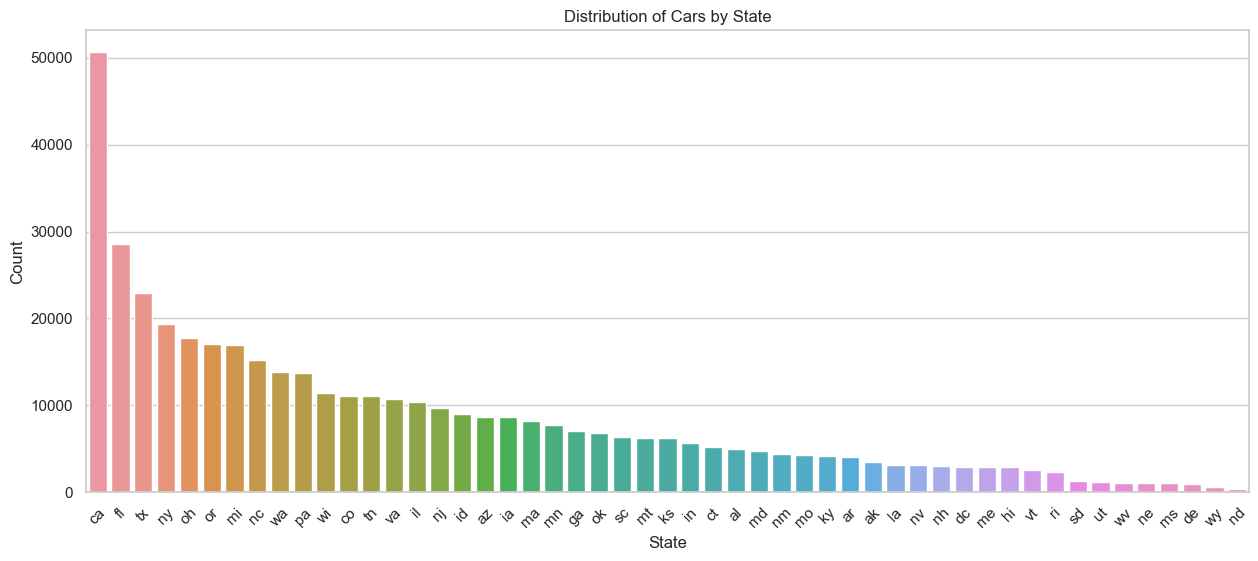

In [84]:
#State attribute distribution obervation
plt.figure(figsize=(15,6))
sns.countplot(data = cars, x='state', order=cars['state'].value_counts().index)
plt.title("Distribution of Cars by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Imbalanced Distribution: Attributes with highly imbalanced distributions, where one or a few categories dominate the majority of the data, may not contribute much to the model's performance. For example, the "state" attribute has highly imbalanced distributions, with some states having significantly more observations than others. Region attribute plays a similar role as it poses insigificant relevance to the analysis or prediction. Also evaluating 'region' attribute's cardinality expresses the high degree of unique values, approximately 404 unique values. Based on this rationale, it is deamed appropreiate to remove 'region' as well. 

In [85]:
cars.drop(columns=['state','region'], inplace = True)

In [91]:
cars.tail()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver
426879,30590,2019.0,bmw,good,NaN,gas,22716.0,clean,other,rwd,NaN,coupe,NaN


In [92]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


#### Continued Data Preparation...

In [121]:
#Checking to see how many rows have x or more Null values...

i = 7
null_values_per_row = cars.isnull().sum(axis=1)
rows_with_nulls = cars[null_values_per_row >= i]
num_rows_with_nulls = rows_with_nulls.shape[0]
print(f"Number of rows with {i} null values:", num_rows_with_nulls)

Number of rows with 7 null values: 4147


**Due to high number of attributes with a high volume of missing values, lets create a cars_cleaned data that removes rows with any null values. This data set will be used for models that requires all features. While the prepared 'Cars' dataset will be used for particular models built under feature selection modeling/analysis.**

In [115]:
#Cleaned Cars dataset removing rows with any missing values
cars_cleaned = cars.dropna()

In [117]:
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80170 entries, 31 to 426836
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         80170 non-null  int64  
 1   year          80170 non-null  float64
 2   manufacturer  80170 non-null  object 
 3   condition     80170 non-null  object 
 4   cylinders     80170 non-null  object 
 5   fuel          80170 non-null  object 
 6   odometer      80170 non-null  float64
 7   title_status  80170 non-null  object 
 8   transmission  80170 non-null  object 
 9   drive         80170 non-null  object 
 10  size          80170 non-null  object 
 11  type          80170 non-null  object 
 12  paint_color   80170 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 8.6+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Simple linear Regression with Odometer

In [130]:
odo_df = cars[['price','odometer']]

In [131]:
odo_df.dropna(inplace = True)
odo_df.reset_index(drop=True, inplace=True)
odo_df.head()

/var/folders/tw/svgh7qhd4w79hdxq3bnvgvgh0000gp/T/ipykernel_6314/48495233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odo_df.dropna(inplace = True)


,price,odometer
0,33590,57923.0
1,22590,71229.0
2,39590,19160.0
3,30990,41124.0
4,15000,128000.0


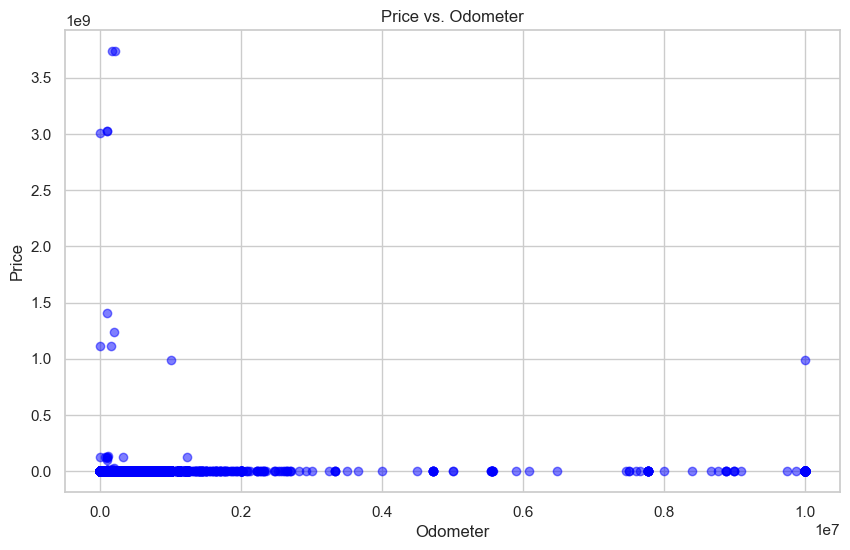

In [133]:
# Scatter plot to see if there are any outliers we need to be concerned about.
plt.figure(figsize=(10, 6))
plt.scatter(odo_df['odometer'], odo_df['price'], alpha=0.5, color='blue')
plt.title('Price vs. Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()

After the observing the scatterplot above, it is clear a small number of outliers discredit our visualization. To remove outliers from the scatter plot, you can filter the data based on certain criteria, such as z-scores or percentile thresholds.

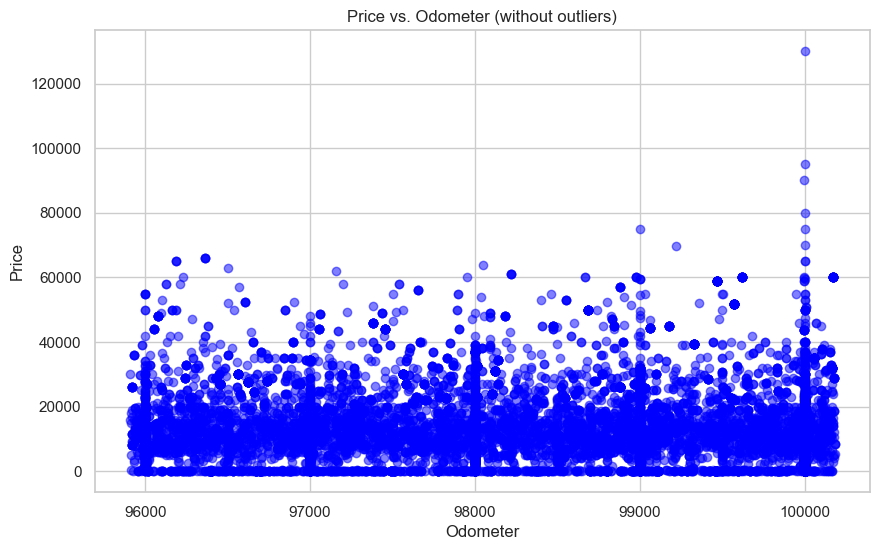

In [147]:
# Calculate z-scores for 'odometer' and 'price'
z_scores = (odo_df[['odometer', 'price']] - odo_df[['odometer', 'price']].mean()) / odo_df[['odometer', 'price']].std()

# Define a threshold for z-score (e.g., 3 standard deviations)
threshold = 0.01

# Filter the DataFrame to remove outliers
odo_df_filtered = odo_df[(np.abs(z_scores) < threshold).all(axis=1)]

# Create scatter plot without outliers
plt.figure(figsize=(10, 6))
plt.scatter(odo_df_filtered['odometer'], odo_df_filtered['price'], alpha=0.5, color='blue')
plt.title('Price vs. Odometer (without outliers)')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()

After ridding the outliers, we can observe there is normal distribution in relation to odometer and the Price of the car. It is fair to assume there are other factors that contibute to the difference in price of a car. Hence, it is unreasonable to model using this sifeature 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.